In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Modules from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from sklearn.preprocessing import StandardScaler


## Load Data


In [325]:
train = pd.read_csv("./data/train.csv", index_col= "id")
test = pd.read_csv("./data/test.csv", index_col= "id")
sample = pd.read_csv("./data/sample_submission.csv", index_col = "id")
test.head()


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [326]:
def non_num_to_num(dataframe):
    """
    The purpose of this function is to take care of all the non numerical data and convert it to categroy and assign a number to it.
    dataframe: The pandas dataframe on which we want to use the function
    """
    df = pd.DataFrame()
    for label, content in dataframe.items():
        if not pd.api.types.is_any_real_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes + 1
        else:
            df[label] = content
    return df

# We might have to use onehot encoding if we do not get a good accuracy. 
# so lets just check running the code once.

In [338]:
train_num = non_num_to_num(train)

test.isna().sum(
    
)
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [336]:
train_num.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2,21,1,35.0,0,1,2,65101.0,124.0,187,0
1,2,43,1,28.0,0,3,2,58911.0,26.0,288,1
2,1,25,1,14.0,1,2,1,38043.0,152.0,254,0
3,1,35,1,1.0,0,1,2,2630.0,156.0,76,0
4,1,36,1,15.0,1,1,1,31951.0,152.0,294,0


In [323]:
train_num["Response"].value_counts()
train_num.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2,21,1,35.0,0,1,2,65101.0,124.0,187,0
1,2,43,1,28.0,0,3,2,58911.0,26.0,288,1
2,1,25,1,14.0,1,2,1,38043.0,152.0,254,0
3,1,35,1,1.0,0,1,2,2630.0,156.0,76,0
4,1,36,1,15.0,1,1,1,31951.0,152.0,294,0


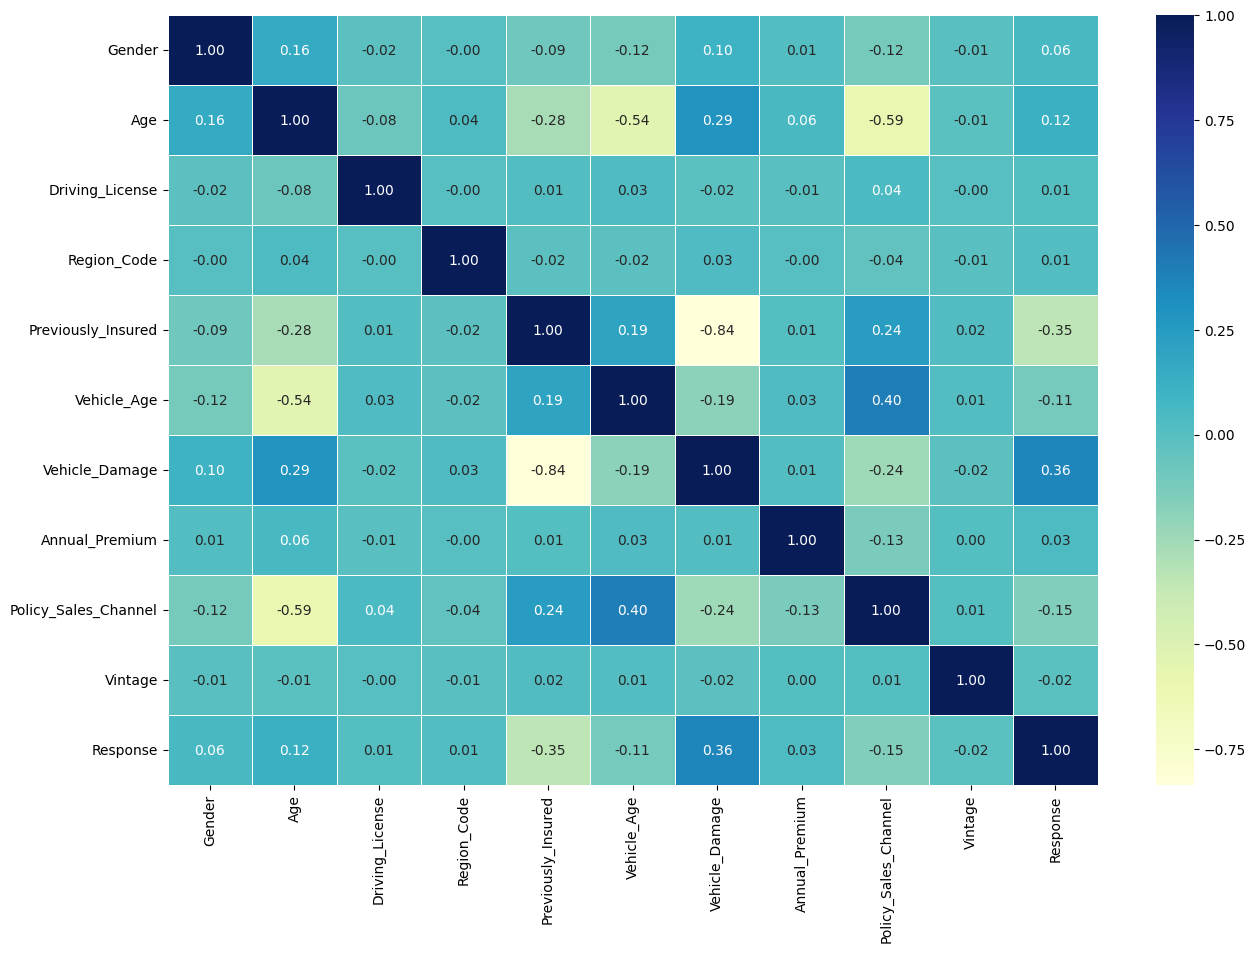

In [35]:
# Let us make a correlation matrix
corr_matrix = train_num.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths= 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu");

In [36]:
df1 = train_num[train_num["Response"]==1]
df2 = train_num[train_num["Response"]==0]


In [37]:

same = pd.concat([df1,df2.sample(len(df1))])

In [38]:
same = same.sample(len(same),random_state=100)

In [39]:
same.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1451662,1,49,1,7.0,0,1,2,2630.0,156.0,126,1
6126239,2,43,1,8.0,1,1,1,2630.0,26.0,182,0
2389712,2,23,1,36.0,0,2,2,2630.0,26.0,256,1
7374373,2,24,1,46.0,1,2,1,32966.0,152.0,255,0
3005152,1,47,1,28.0,0,3,2,36407.0,122.0,24,1


In [40]:
same_x , same_y = same.drop("Response",axis=1),same["Response"]
strain_x , stest_x ,strain_y , stest_y = train_test_split(same_x,same_y,test_size=0.2,random_state=42)
len(strain_x),len(strain_y),len(stest_x),len(stest_y)

(2264094, 2264094, 566024, 566024)

In [58]:
sample = train_num.sample(200000,random_state=100)
X = sample.drop("Response",axis=1)
y = sample["Response"]

In [59]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X, y)
y_resampled.value_counts()


Response
0    164993
1     24686
Name: count, dtype: int64

In [60]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X, y)
y_resampled.value_counts()

Response
0    125539
1     24686
Name: count, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [62]:
sample_2 = train_num.sample(50000,random_state=69)

### DATA SETS SPLITTED
* X_train: 70% of the data
* X_test: 30% of the data
* Sample_2: 50,000 for finale testing
* Strain_x: 80% of the data
* Stest_x: 20% of the data

## Visualizing Data


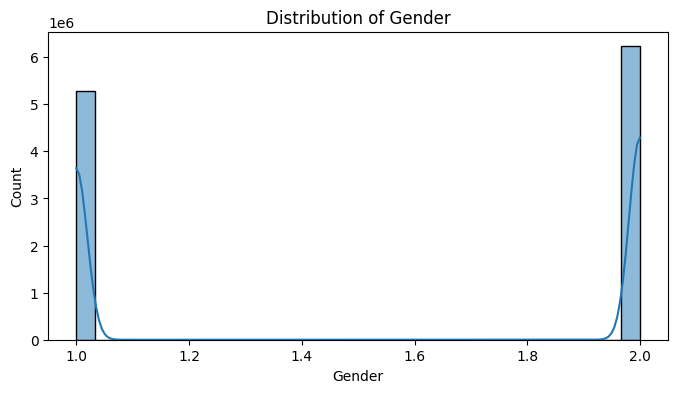

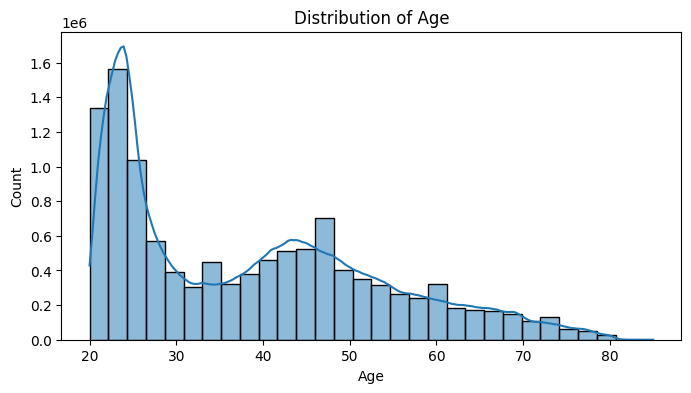

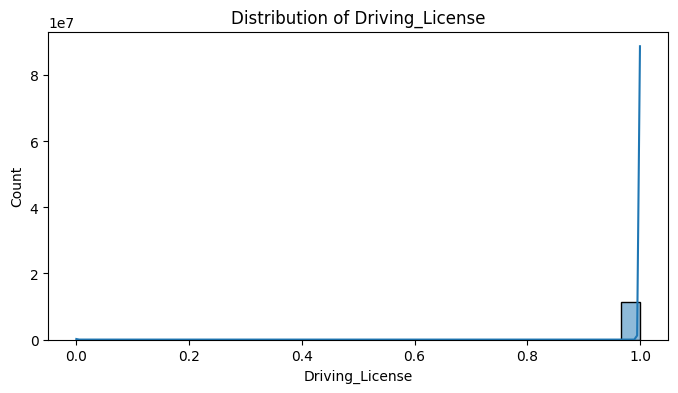

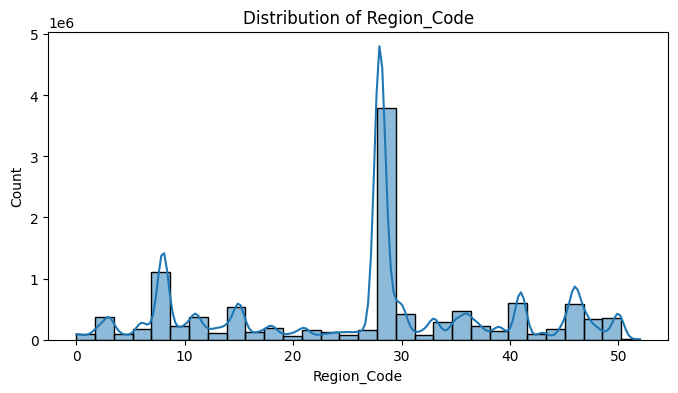

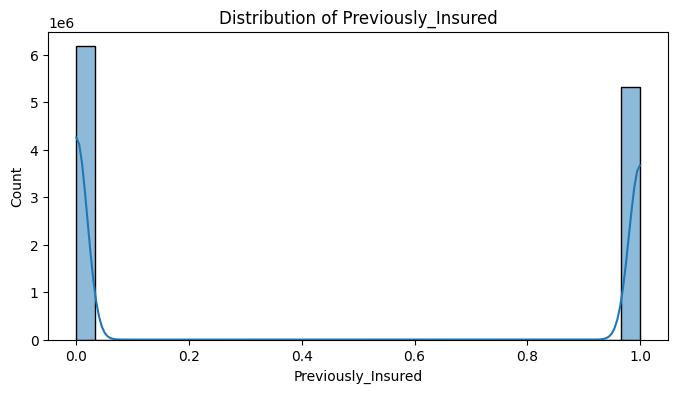

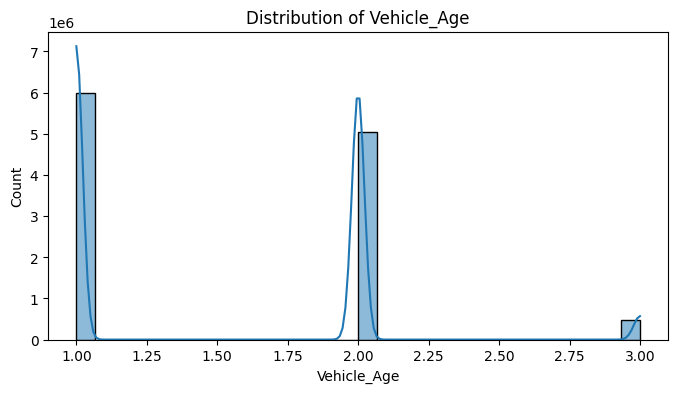

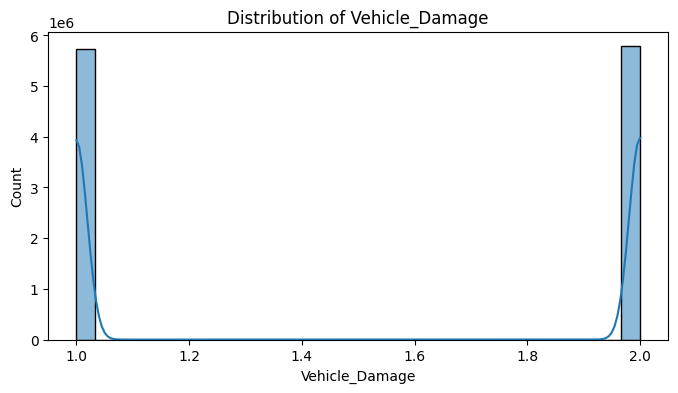

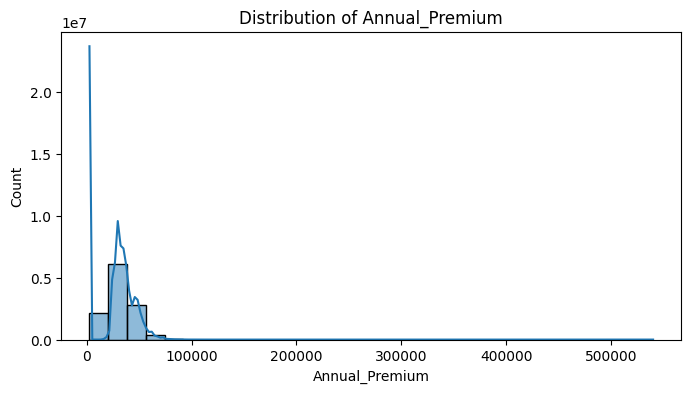

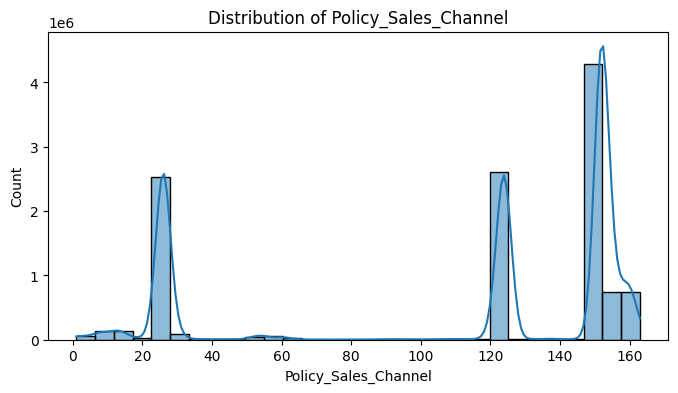

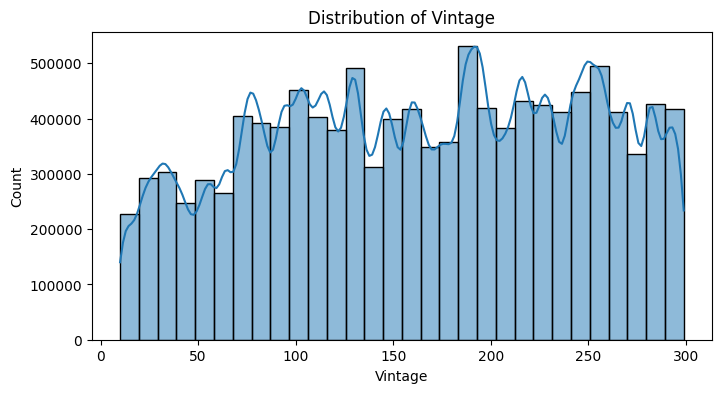

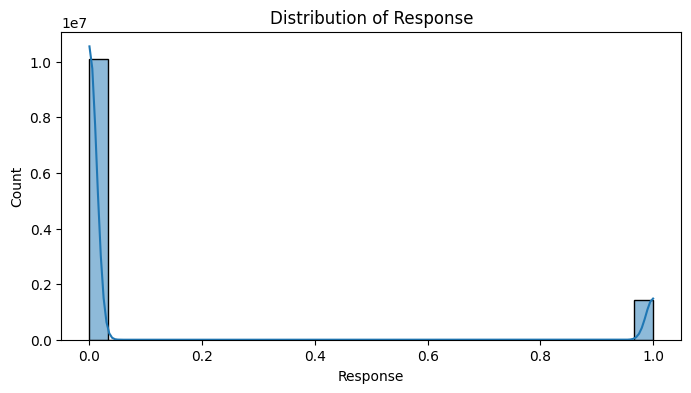

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in train_num:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_num[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


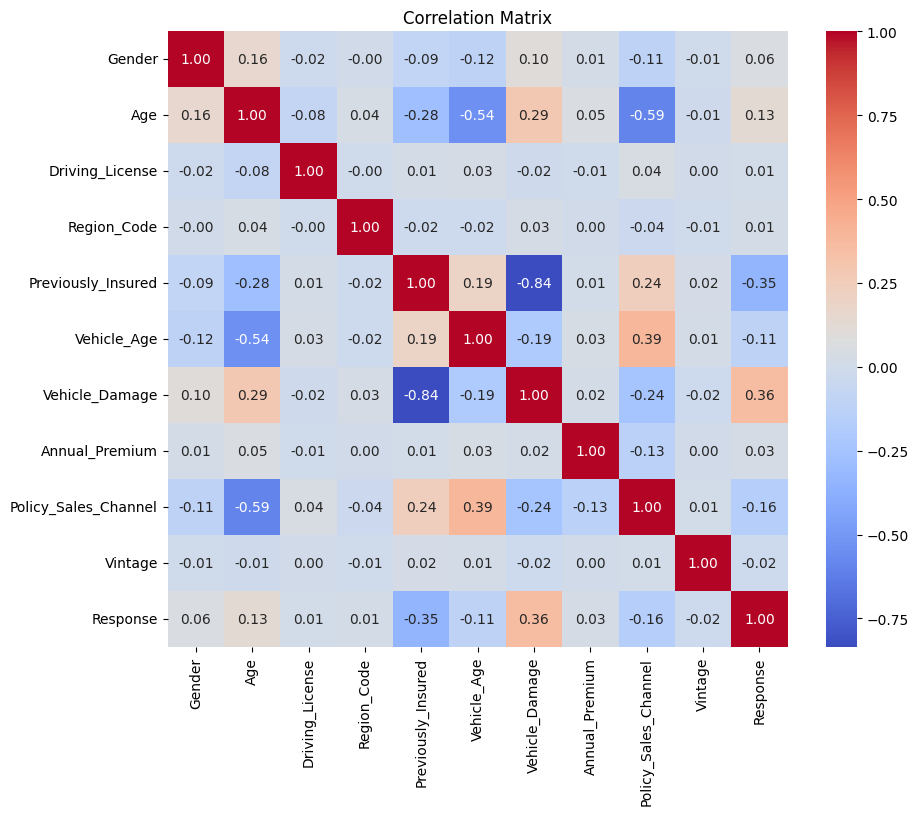

In [66]:
plt.figure(figsize=(10, 8))
correlation_matrix = sample.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


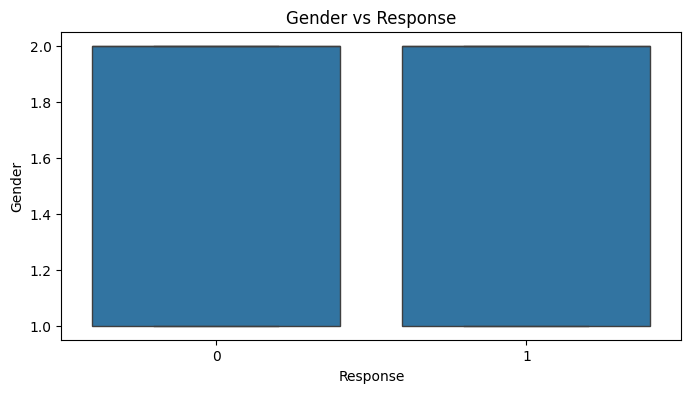

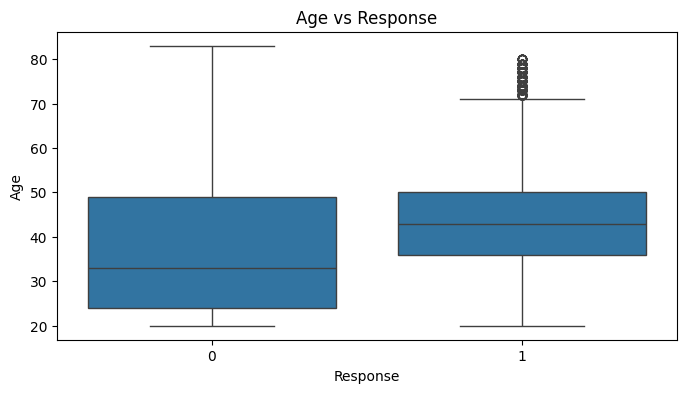

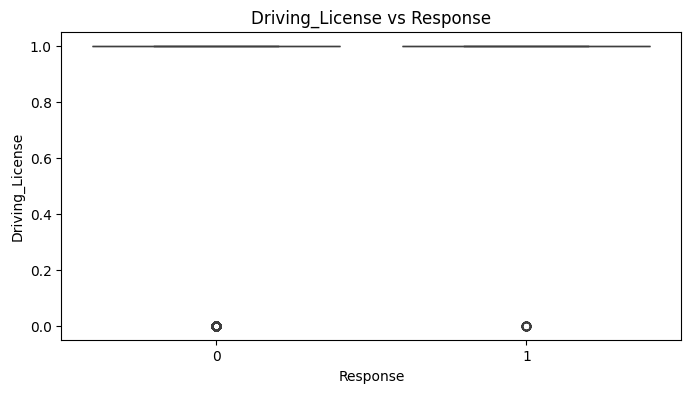

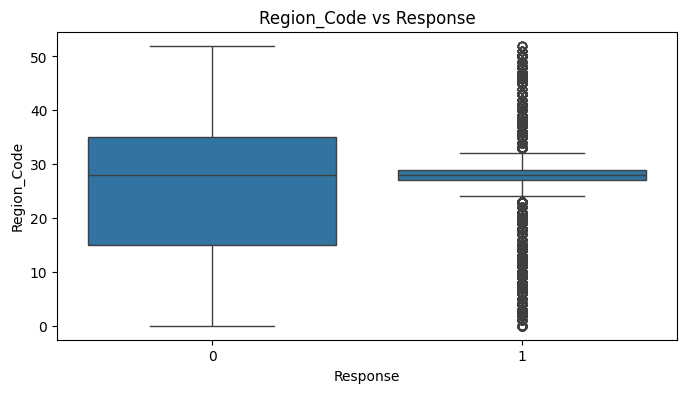

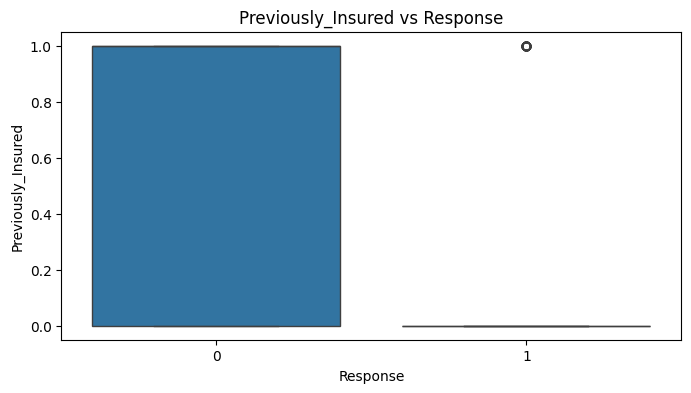

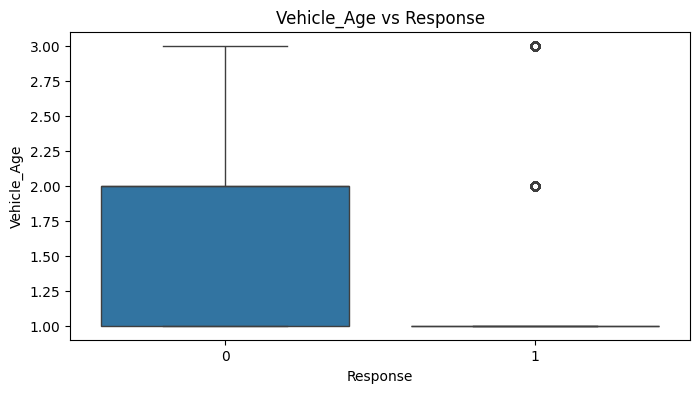

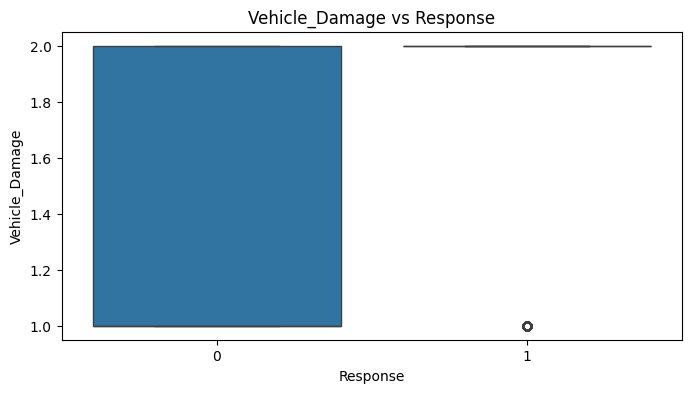

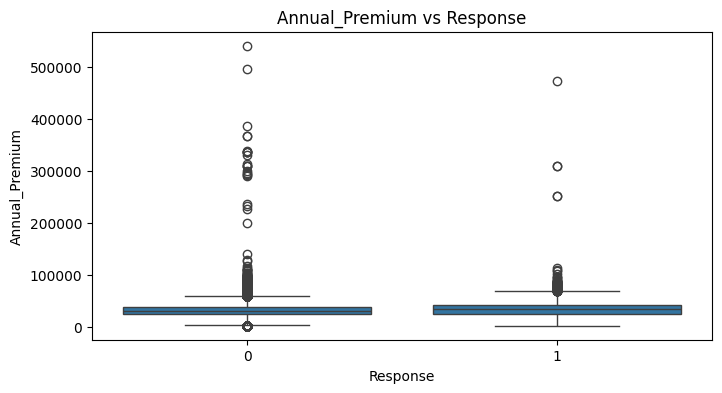

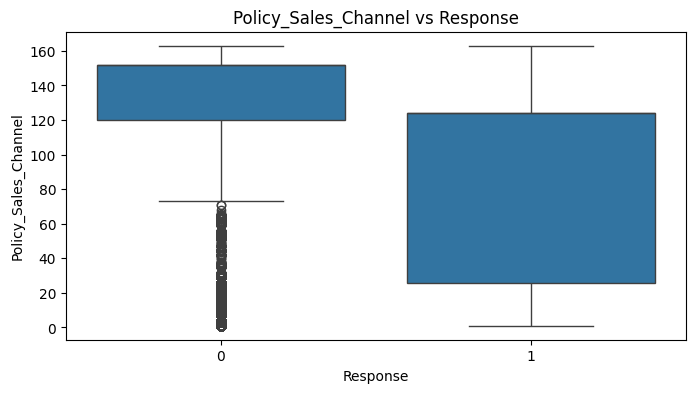

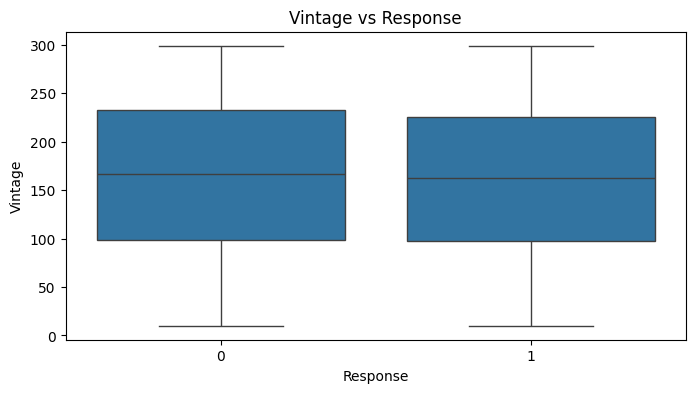

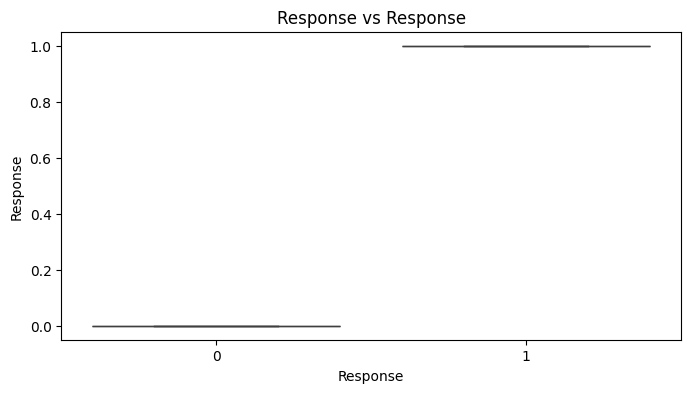

In [69]:
for column in sample:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Response', y=column, data=sample)
    plt.title(f'{column} vs Response')
    plt.show()


## Important features through RandomForest Classifier Model

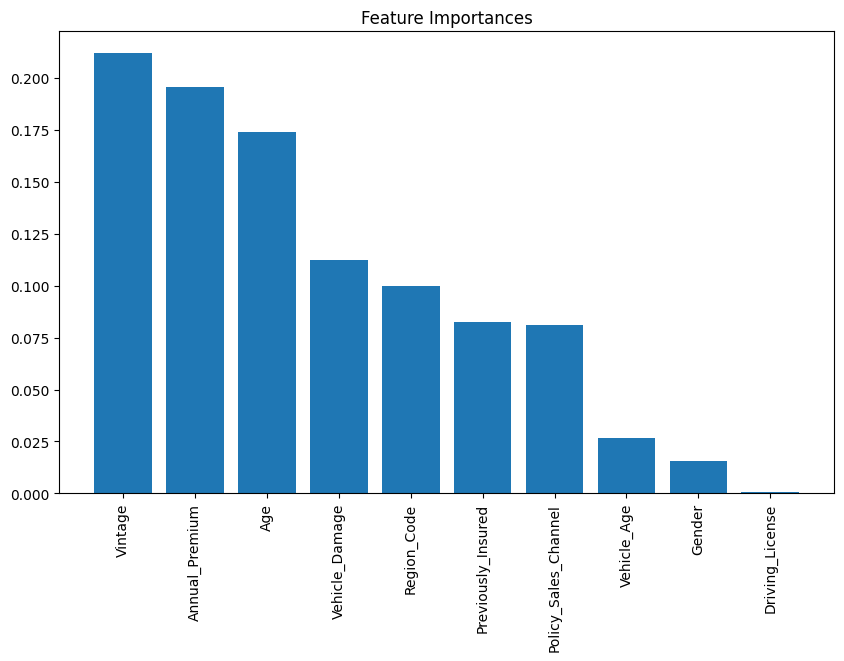

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.show()


In [72]:
correlation_matrix["Response"].sort_values(ascending=False)

Response                1.000000
Vehicle_Damage          0.359588
Age                     0.125379
Gender                  0.056312
Annual_Premium          0.031371
Region_Code             0.014948
Driving_License         0.006770
Vintage                -0.018816
Vehicle_Age            -0.112021
Policy_Sales_Channel   -0.156434
Previously_Insured     -0.346591
Name: Response, dtype: float64

From the correlation matrix we can see that there is a low correlation between
* Driving License and Response
* Region_Code and Response
* Vintage and Response

But from the feature importance we can see that there is a low significance of 
* Driving_License
* Gender
* Vehicale_Age

In [73]:
# Creating a Model after dropping Driving license column
X_train.drop("Driving_License", axis=1, inplace=True)
X_test.drop("Driving_License", axis=1, inplace=True)
stest_x.drop("Driving_License", axis=1, inplace=True)
strain_x.drop("Driving_License", axis=1, inplace=True)
sample_2.drop("Driving_License", axis=1, inplace=True)

In [89]:
from sklearn.ensemble import RandomForestClassifier


# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.8555294222064436


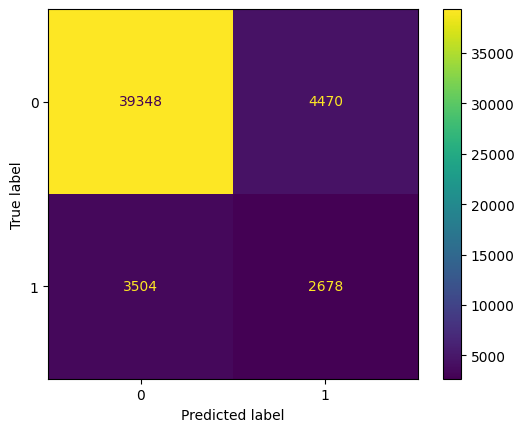

In [228]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
rf_report = classification_report(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(rf_model, sample_2.drop("Response",axis=1), sample_2["Response"])

In [93]:
from sklearn.ensemble import GradientBoostingClassifier


# Create and train the model
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8573710836957487


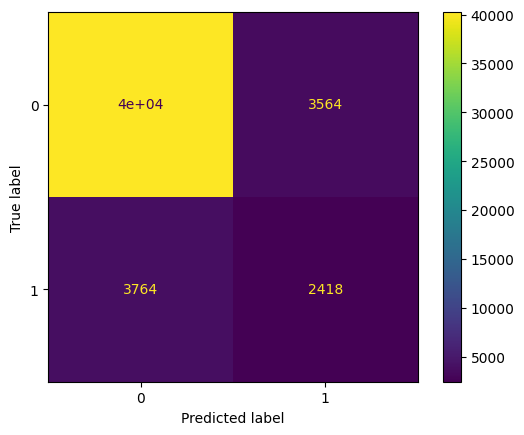

In [229]:
gb_report = classification_report(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(gb_model, sample_2.drop("Response",axis=1), sample_2["Response"])

In [95]:
import lightgbm as lgb

# Create and train the model
lg_model = lgb.LGBMClassifier(n_estimators=100)
lg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


[LightGBM] [Info] Number of positive: 17270, number of negative: 87887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 105157, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.164231 -> initscore=-1.627081
[LightGBM] [Info] Start training from score -1.627081
Accuracy: 0.8620750865359013


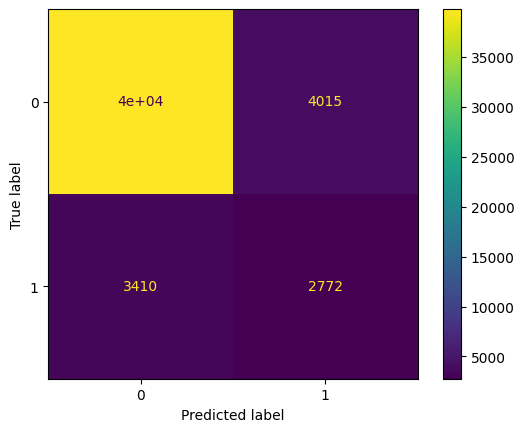

In [230]:
lg_report = classification_report(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(lg_model, sample_2.drop("Response",axis=1), sample_2["Response"])

In [97]:
import xgboost as xgb

# Create and train the model
xg_model = xgb.XGBClassifier(n_estimators=100)
xg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8640055027957753


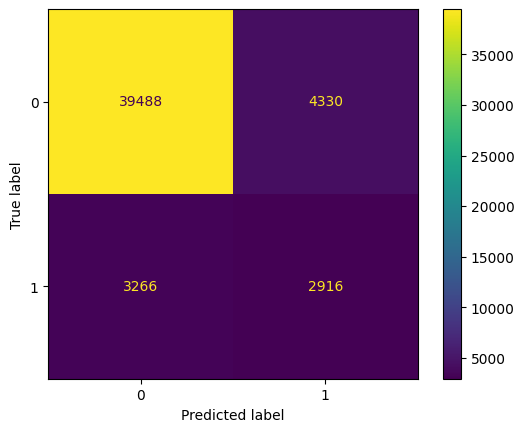

In [231]:
xg_report = classification_report(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(xg_model, sample_2.drop("Response",axis=1), sample_2["Response"])


### TOP 4 Models are:
* LightGBM
* GradientBoostClassifier
* RandomForestClassifier
* XGBoost

In [104]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     37652
           1       0.58      0.44      0.50      7416

    accuracy                           0.86     45068
   macro avg       0.74      0.69      0.71     45068
weighted avg       0.84      0.86      0.85     45068



In [105]:
print(gb_report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     37652
           1       0.60      0.39      0.47      7416

    accuracy                           0.86     45068
   macro avg       0.75      0.67      0.69     45068
weighted avg       0.84      0.86      0.84     45068



In [106]:
print(lg_report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     37652
           1       0.61      0.44      0.51      7416

    accuracy                           0.86     45068
   macro avg       0.75      0.69      0.72     45068
weighted avg       0.85      0.86      0.85     45068



In [107]:
print(xg_report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     37652
           1       0.61      0.48      0.54      7416

    accuracy                           0.86     45068
   macro avg       0.76      0.71      0.73     45068
weighted avg       0.85      0.86      0.86     45068



## Going with XGBoost



In [109]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


In [141]:
param_dist = {
    'n_estimators': [300, 400],
    'max_depth': [5, 6, 7],
    'learning_rate': [ 0.1, 0.2],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [1, 2, 5]
}

In [142]:
xgb = XGBClassifier()


In [143]:
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='f1',  # Use appropriate scoring metric
                           cv=5,  # Number of cross-validation folds
                           verbose=2,
                           n_jobs=-1)  # Use all available cores


In [144]:
grid_search.fit(X_train, y_train)


TypeError: Parameter grid for parameter 'colsample_bytree' needs to be a list or a numpy array, but got 0.8 (of type float) instead. Single values need to be wrapped in a list with one element.

In [126]:
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.9}


In [127]:
best_model = grid_search.best_estimator_


In [128]:
yp = best_model.predict(X_test)

In [129]:
print(classification_report(y_test, yp))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     37652
           1       0.61      0.50      0.55      7416

    accuracy                           0.87     45068
   macro avg       0.76      0.72      0.73     45068
weighted avg       0.86      0.87      0.86     45068



In [130]:
yp = best_model.predict(sample_2.drop("Response",axis=1))
print(classification_report(sample_2["Response"], yp))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     43818
           1       0.40      0.49      0.44      6182

    accuracy                           0.85     50000
   macro avg       0.66      0.69      0.68     50000
weighted avg       0.86      0.85      0.85     50000



In [131]:
yp = best_model.predict(stest_x)
print(classification_report(stest_y, yp))

              precision    recall  f1-score   support

           0       0.64      0.90      0.74    282751
           1       0.82      0.49      0.61    283273

    accuracy                           0.69    566024
   macro avg       0.73      0.69      0.68    566024
weighted avg       0.73      0.69      0.68    566024



In [147]:
from xgboost import XGBClassifier
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [1, 2, 5]
}

xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(estimator=xgb_model,
                                    param_distributions=param_dist,
                                    n_iter=100,  # Number of parameter settings to sample
                                    scoring='f1',
                                    cv=5,
                                    verbose=2,
                                    n_jobs=-1)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 2, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}


In [148]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     37652
           1       0.52      0.75      0.61      7416

    accuracy                           0.85     45068
   macro avg       0.73      0.81      0.76     45068
weighted avg       0.88      0.85      0.86     45068



In [149]:
sample3 = train_num.sample(300000,random_state=45)
X = sample3.drop(["Response","Driving_License"],axis=1)
y = sample3["Response"]


In [150]:
model_3 = XGBClassifier(**random_search.best_params_)
model_3.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [151]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     37652
           1       0.61      0.50      0.55      7416

    accuracy                           0.87     45068
   macro avg       0.76      0.72      0.73     45068
weighted avg       0.86      0.87      0.86     45068



In [164]:
sample3 = train_num.sample(len(train_num)//10,random_state=45)
model = XGBClassifier(**random_search.best_params_)
X = sample3.drop(["Response","Driving_License"],axis=1)
y = sample3["Response"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.value_counts()

Response
0    807226
1    113157
Name: count, dtype: int64

In [167]:
# Assuming you have validation scores
from sklearn.metrics import f1_score
def learning_graph(model, X_train, y_train, X_test, y_test):
    train_scores, val_scores , f1_scores = [], [] , []
    for train_size in range(1, len(X_train), len(X_train)//10):
        model.fit(X_train[:train_size], y_train[:train_size])
        train_scores.append(model.score(X_train[:train_size], y_train[:train_size]))
        val_scores.append(model.score(X_test, y_test))
        f1_scores.append(f1_score(y_test, model.predict(X_test)))

    plt.plot(range(1, len(X_train), len(X_train)//10), train_scores, label='Train Score')
    plt.plot(range(1, len(X_train), len(X_train)//10), val_scores, label='Validation Score')
    plt.plot(range(1, len(X_train), len(X_train)//10), f1_scores, label='F1 Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

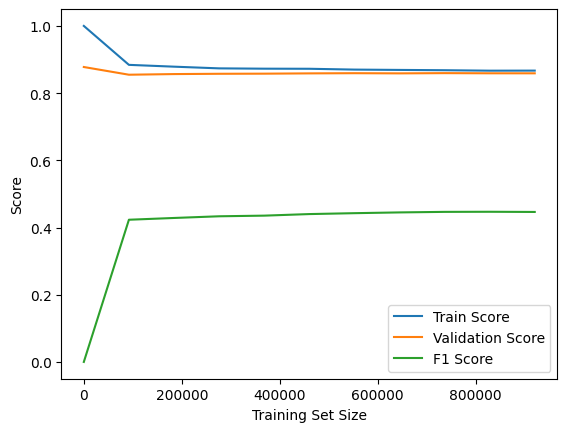

In [168]:
learning_graph(model, X_train, y_train, X_test, y_test)

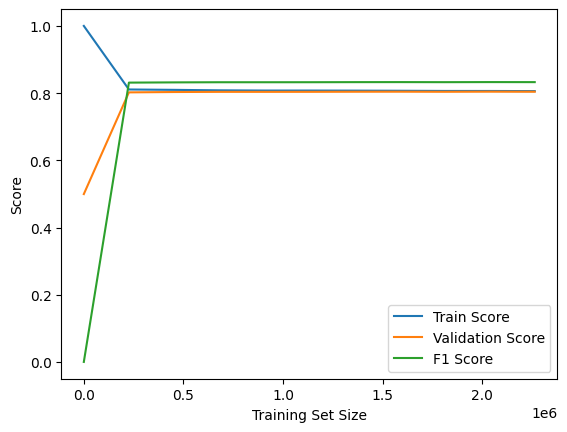

In [169]:
X_train, X_test, y_train, y_test = strain_x, stest_x, strain_y, stest_y

learning_graph(model, X_train, y_train, X_test, y_test)

In [172]:
model_same = XGBClassifier(**random_search.best_params_)
model_same.fit(strain_x[:300000],strain_y[:300000])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [177]:
pred = model_same.predict(stest_x)

In [178]:
print(classification_report(stest_y, pred))

              precision    recall  f1-score   support

           0       0.96      0.63      0.76    282751
           1       0.73      0.97      0.83    283273

    accuracy                           0.80    566024
   macro avg       0.84      0.80      0.80    566024
weighted avg       0.84      0.80      0.80    566024



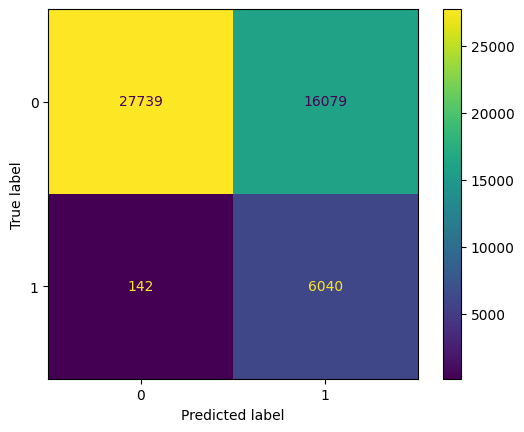

In [180]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_same, sample_2.drop("Response",axis=1), sample_2["Response"])

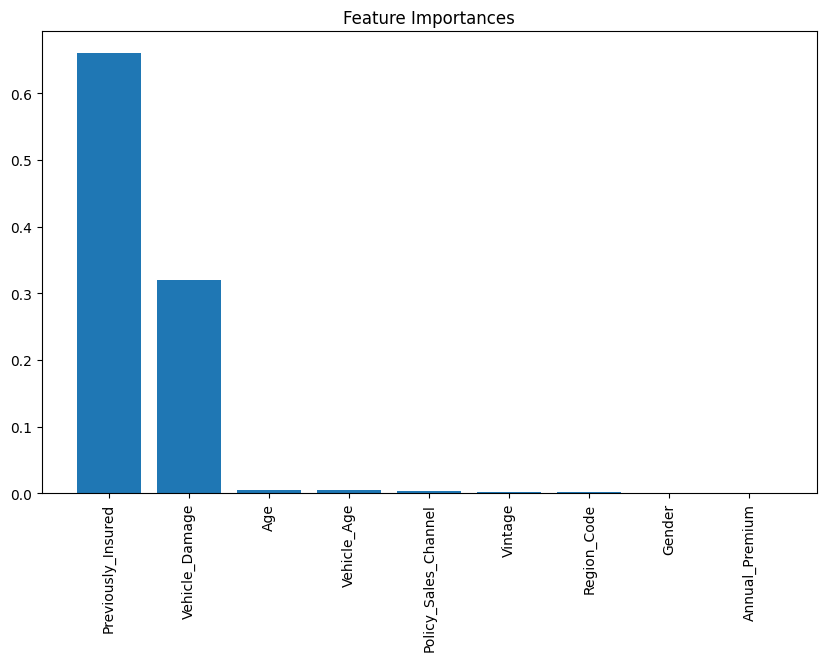

In [181]:
importances = model_same.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.show()

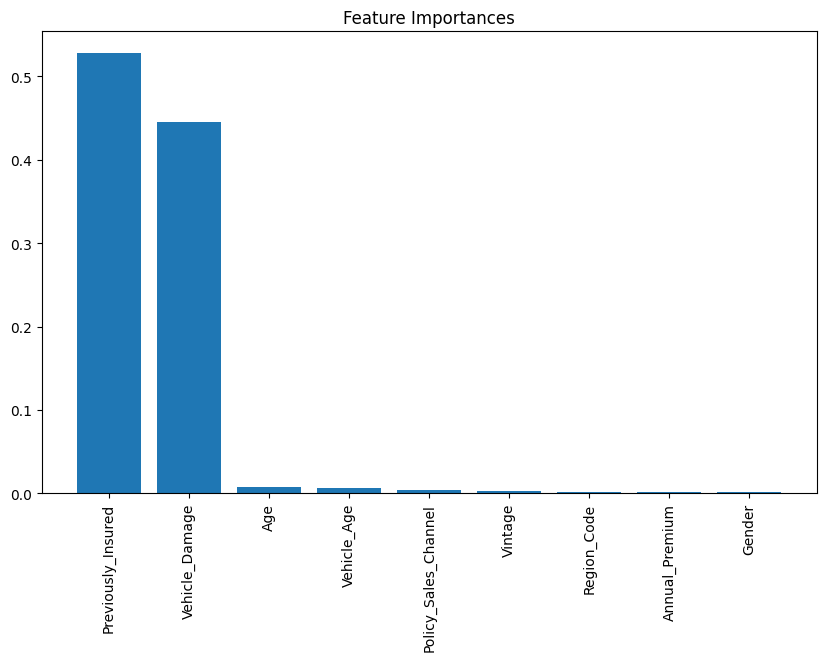

In [183]:
importances = model_3.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.show()

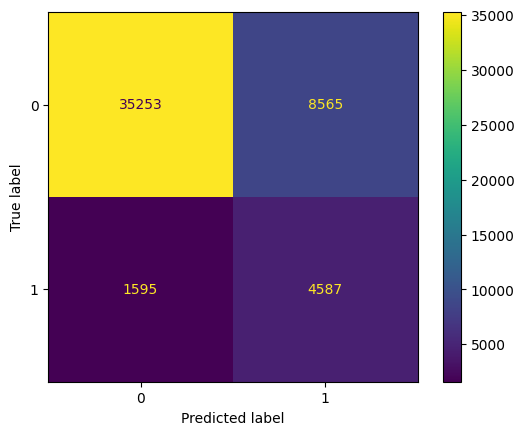

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, sample_2.drop("Response",axis=1), sample_2["Response"])

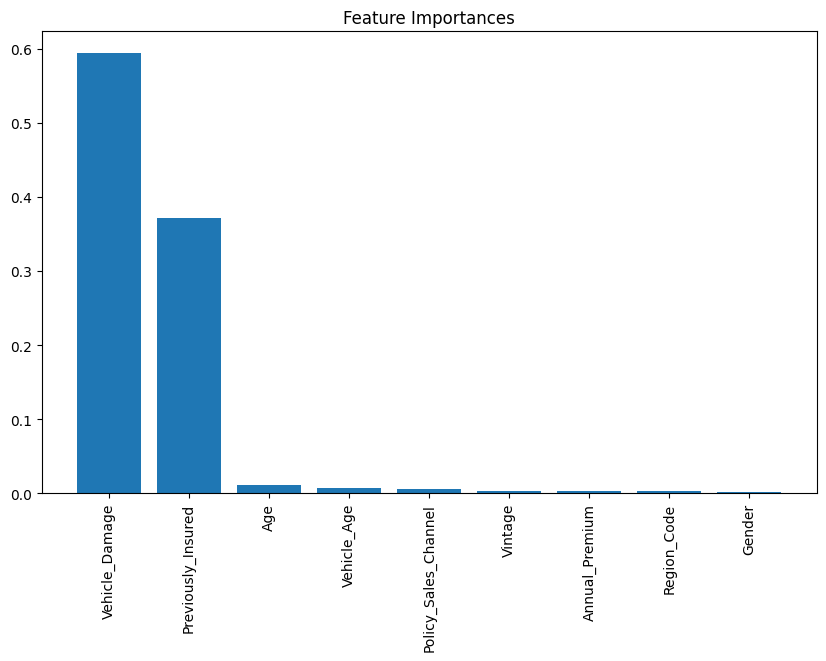

In [185]:
importances = best_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.show()

In [244]:
sample4 = train_num.sample(250000,random_state=0)
X = sample4.drop(["Response","Driving_License"],axis=1)
y = sample4["Response"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [245]:
model_4 = XGBClassifier(**random_search.best_params_)
model_4.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     43880
           1       0.41      0.43      0.42      6120

    accuracy                           0.86     50000
   macro avg       0.67      0.67      0.67     50000
weighted avg       0.86      0.86      0.86     50000



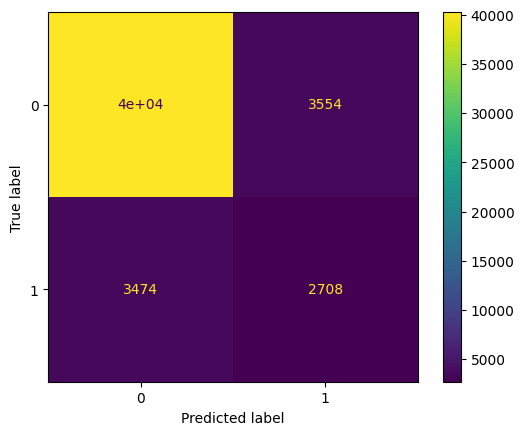

In [246]:
y_pred = model_4.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model_4, sample_2.drop("Response",axis=1), sample_2["Response"])

In [247]:
df4 = pd.concat([df1 , df2.sample(len(df1//2))])

In [248]:
df4 = df4.sample(len(df4))
df4.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
5717751,2,43,1,41.0,0,1,2,39715.0,26.0,282,1
7014687,1,24,1,10.0,1,2,1,33564.0,152.0,30,0
1534437,2,51,1,28.0,0,3,2,43739.0,124.0,155,1
5326046,1,23,1,46.0,0,2,2,31661.0,152.0,202,0
8834883,1,24,1,29.0,0,2,2,39309.0,152.0,265,1


In [250]:
X = df4.drop(["Response","Driving_License"],axis=1)
y = df4["Response"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_5 = XGBClassifier(**random_search.best_params_)
model_5.fit(X_train,y_train)

y_pred = model_5.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.96      0.63      0.76    282576
           1       0.73      0.97      0.83    283448

    accuracy                           0.80    566024
   macro avg       0.84      0.80      0.80    566024
weighted avg       0.84      0.80      0.80    566024



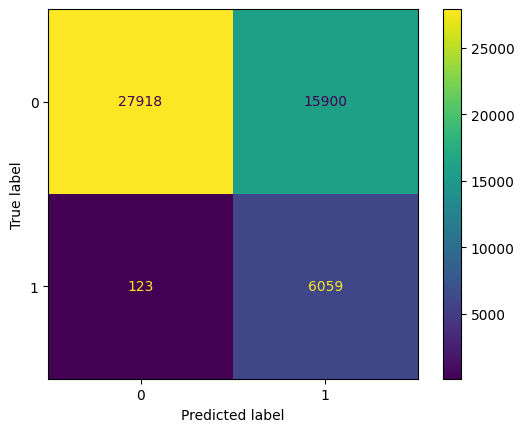

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_5, sample_2.drop("Response",axis=1), sample_2["Response"])

In [251]:
X = sample3.drop(["Response","Driving_License"],axis=1)
y = sample3["Response"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [252]:
xgb_best = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='auc',
    subsample=1.0,
    n_estimators=400,
    max_depth=6,
    learning_rate=0.2,
    colsample_bytree=0.7
)
xgb_best.fit(X_train, y_train)


c:\Users\Sabah Sayed\Desktop\AI CODES\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [19:09:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [256]:
from catboost import CatBoostClassifier
catboost_best = CatBoostClassifier(
    silent=True,
    l2_leaf_reg=9,
    iterations=300,
    depth=6,
    learning_rate=0.1,
)
catboost_best.fit(X_train,y_train)

In [257]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score

voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_best),
    ('catboost', catboost_best)
], voting='soft')

voting_clf.fit(X_train, y_train)

y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]
roc_auc_catboost = roc_auc_score(y_test, y_pred_proba)

c:\Users\Sabah Sayed\Desktop\AI CODES\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [19:48:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [260]:
y_preds = voting_clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94    202097
           1       0.59      0.08      0.14     27999

    accuracy                           0.88    230096
   macro avg       0.74      0.53      0.54    230096
weighted avg       0.85      0.88      0.84    230096



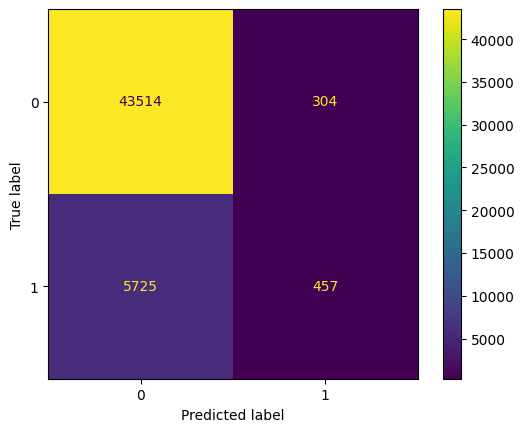

In [261]:
ConfusionMatrixDisplay.from_estimator(voting_clf, sample_2.drop("Response",axis=1), sample_2["Response"])

In [295]:
# Get predictions from the base models

model1 = model_same
model2 = voting_clf
model3 = best_model
probs_model1 = model1.predict_proba(X_test)[:, 1]  # Probability of class 1
probs_model2 = model2.predict_proba(X_test)[:, 1]
probs_model3 = model3.predict_proba(X_test)[:, 1]
df = pd.DataFrame({'Model 1': probs_model1, 'Model 2': probs_model2, 'Model 3': probs_model3, "y_test": y_test})
df["avg"] = df["Model 1"]+df["Model 2"]+df["Model 3"]/3


preds = df[["Model 1", "Model 2", "Model 3"]].to_numpy()


In [296]:
preds.shape


(230096, 3)

In [297]:
def evaluate_performance(weights, preds, true_labels):
    weighted_preds = weighted_average(preds, weights)
    final_preds = (weighted_preds >= 0.5).astype(int)
    return f1_score(true_labels, final_preds)



In [298]:
def weighted_average(preds, weights):
    return np.dot(preds, weights)

# Grid search for weights
best_f1_score = 0
best_weights = None

# Define the grid of weights
weight_ranges = np.linspace(0, 1, 11)
for w1 in weight_ranges:
    for w2 in weight_ranges:
        for w3 in weight_ranges:
            if np.isclose(w1 + w2 + w3, 1):  # Ensure weights sum to 1
                weights = np.array([w1, w2, w3])
                f1 = evaluate_performance(weights, preds, true_labels)
                if f1 > best_f1_score:
                    best_f1_score = f1
                    best_weights = weights

print("Best Weights:", best_weights)
print("Best F1 Score:", best_f1_score)


Best Weights: [0.4 0.5 0.1]
Best F1 Score: 0.48459285295840654


In [299]:
df["best_1"] = df["Model 1"]*best_weights[0]+df["Model 2"]*best_weights[1]+df["Model 3"]*best_weights[2]

In [301]:
print(classification_report(df["y_test"], df["best_1"]>0.5))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88    202097
           1       0.36      0.74      0.48     27999

    accuracy                           0.81    230096
   macro avg       0.66      0.78      0.68    230096
weighted avg       0.88      0.81      0.83    230096



In [302]:
df["best_accuracy"] = df["Model 1"]*0.1+df["Model 2"]*0.9

In [303]:
print(classification_report(df["y_test"], df["best_accuracy"]>0.5))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94    202097
           1       0.55      0.15      0.23     27999

    accuracy                           0.88    230096
   macro avg       0.72      0.56      0.58    230096
weighted avg       0.85      0.88      0.85    230096



In [304]:
confusion_matrix(df["y_test"], df["best_1"]>0.5)

array([[165426,  36671],
       [  7319,  20680]], dtype=int64)

In [305]:
confusion_matrix(df["y_test"], df["best_accuracy"]>0.5)

array([[198691,   3406],
       [ 23897,   4102]], dtype=int64)

In [367]:
test = pd.read_csv("./data/test.csv", index_col= "id")
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [368]:
test1 = test
for label, content in test1.items():
    if not pd.api.types.is_any_real_numeric_dtype(content):
        test1[label] = pd.Categorical(content).codes + 1

In [369]:
test1.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
11504798,1,20,1,47.0,0,2,1,2630.0,160.0,228
11504799,2,47,1,28.0,0,1,2,37483.0,124.0,123
11504800,2,47,1,43.0,0,1,2,2630.0,26.0,271
11504801,1,22,1,47.0,1,2,1,24502.0,152.0,115
11504802,2,51,1,19.0,0,1,1,34115.0,124.0,148


In [371]:
test1.drop("Driving_License", axis=1, inplace=True)

In [372]:
model1 = model_same
model2 = voting_clf
model3 = best_model
probs_model1 = model1.predict_proba(test1)[:, 1]  
probs_model2 = model2.predict_proba(test1)[:, 1]
probs_model3 = model3.predict_proba(test1)[:, 1]
df = pd.DataFrame({'Model 1': probs_model1, 'Model 2': probs_model2, 'Model 3': probs_model3})
df.head()

,Model 1,Model 2,Model 3
0,0.017399,0.005665,0.008643
1,0.868755,0.423529,0.693749
2,0.823185,0.249452,0.511148
3,0.003155,0.000060,0.001393
4,0.361650,0.039830,0.055849


In [373]:
preds = df[["Model 1", "Model 2", "Model 3"]].to_numpy()


In [390]:
df["best_accuracy"] = df["Model 1"]*0.1+df["Model 2"]*0.9
df["best_1"] = df["Model 1"]*best_weights[0]+df["Model 2"]*best_weights[1]+df["Model 3"]*best_weights[2]
df.head()

,Model 1,Model 2,Model 3,best_accuracy,id,best_1
0,0.017399,0.005665,0.008643,0.006839,11504798,0.010657
1,0.868755,0.423529,0.693749,0.468051,11504799,0.628641
2,0.823185,0.249452,0.511148,0.306825,11504800,0.505115
3,0.003155,0.000060,0.001393,0.000369,11504801,0.001431
4,0.361650,0.039830,0.055849,0.072012,11504802,0.170160


In [392]:
df["best_1"]= df["best_1"].apply(lambda x: x>0.5) 
df["best_1"].value_counts()

best_1
False    5764972
True     1904894
Name: count, dtype: int64

In [393]:
df

,Model 1,Model 2,Model 3,best_accuracy,id,best_1
0,0.017399,0.005665,0.008643,0.006839,11504798,False
1,0.868755,0.423529,0.693749,0.468051,11504799,True
2,0.823185,0.249452,0.511148,0.306825,11504800,True
3,0.003155,0.000060,0.001393,0.000369,11504801,False
4,0.361650,0.039830,0.055849,0.072012,11504802,False
...,...,...,...,...,...,...
7669861,0.802364,0.192930,0.528102,0.253873,19174659,False
7669862,0.004087,0.000172,0.000363,0.000564,19174660,False
7669863,0.003979,0.000621,0.001121,0.000957,19174661,False
7669864,0.959313,0.511542,0.889279,0.556319,19174662,True


In [394]:
df["id"] = test.index

submission = df[["id", "best_1"]]
submission.rename(columns={"best_1": "Response"}, inplace=True)
submission.set_index("id", inplace=True)
submission.value_counts()

C:\Users\Sabah Sayed\AppData\Local\Temp\ipykernel_26636\2681244266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.rename(columns={"best_1": "Response"}, inplace=True)


Response
False       5764972
True        1904894
Name: count, dtype: int64

In [395]:
submission.head()

,Response
id,
11504798,False
11504799,True
11504800,True
11504801,False
11504802,False


In [396]:
submission.to_csv("submission.csv")